In [1]:
import pandas as pd

# Load the data
file_path = r"C:\Angelina\Schulich MBAN\MMAI 5000\EastWestAirlinesCluster.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [2]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)


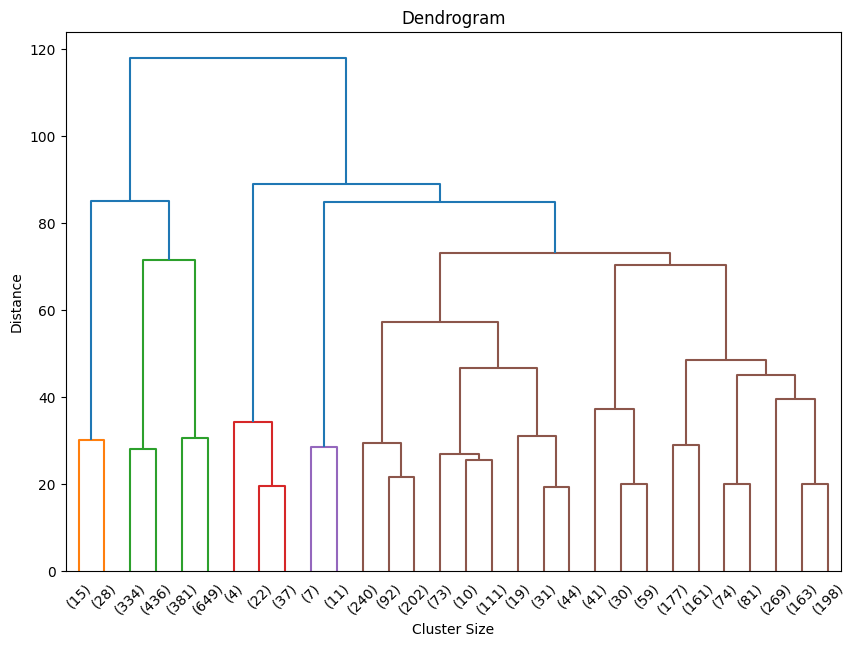

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(data_normalized, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [4]:
from scipy.cluster.hierarchy import fcluster

# Choose the number of clusters (e.g., 5 clusters)
num_clusters = 5
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Display the cluster counts
print(data['Cluster'].value_counts())


Cluster
5    2075
2    1800
3      63
1      43
4      18
Name: count, dtype: int64


In [5]:
# Calculate the centroids
centroids = data.groupby('Cluster').mean()

# Display the centroids
print(centroids)


                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
1        2269.372093   68876.581395   23.255814   1.139535   2.348837   
2        2388.934444   38220.721111    9.431667   1.183889   1.000000   
3        1752.952381  160067.206349  573.587302   2.507937   1.000000   
4        1742.444444  129951.388889   65.666667   3.388889   1.000000   
5        1695.324337  101276.799518  251.093494   2.813012   1.000000   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
1         1.000000  14689.837209    17.534884         582.627907   
2         1.000000   3770.797222     6.238333         113.728333   
3         1.000000  42723.841270    34.142857        8148.619048   
4         3.722222  86259.888889    26.222222         422.222222   
5         1.000000  27421.138313    15.320482         524.836627   

         Fl

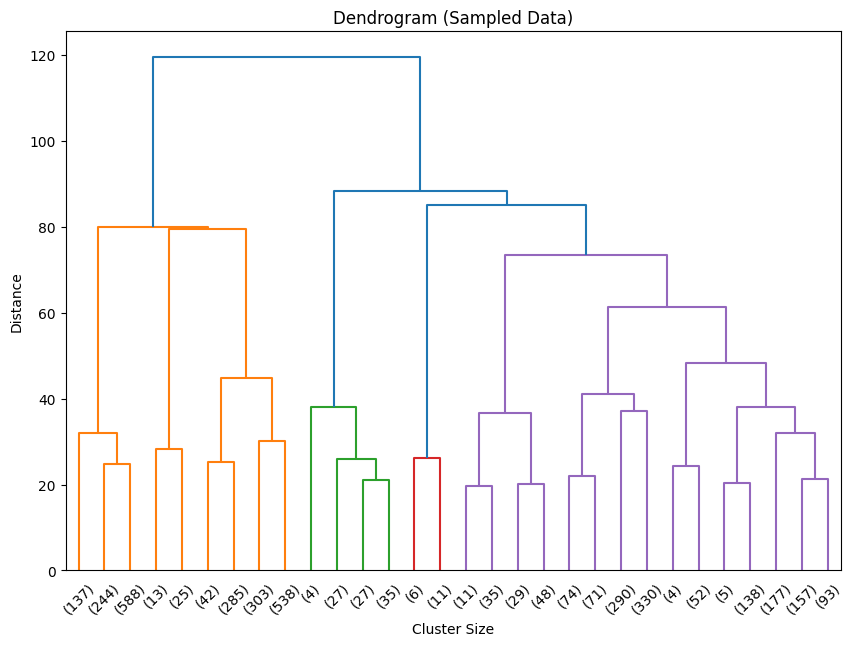

Cluster
5    1514
2    1206
1     969
3      93
4      17
Name: count, dtype: int64


In [6]:
import numpy as np

# Remove 5% of the data randomly
np.random.seed(42)
sampled_data = data.sample(frac=0.95, random_state=42)
sampled_data_normalized = scaler.transform(sampled_data.drop(columns=['Cluster']))

# Perform hierarchical clustering again
linked_sampled = linkage(sampled_data_normalized, method='ward')

# Plot the dendrogram for sampled data
plt.figure(figsize=(10, 7))
dendrogram(linked_sampled, truncate_mode='lastp', p=30)
plt.title('Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Form clusters on the sampled data
sampled_clusters = fcluster(linked_sampled, num_clusters, criterion='maxclust')
sampled_data['Cluster'] = sampled_clusters

# Display the cluster counts for sampled data
print(sampled_data['Cluster'].value_counts())


In [7]:
from sklearn.cluster import KMeans

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_normalized)
data['KMeans_Cluster'] = kmeans.labels_

# Display the cluster counts for k-means clustering
print(data['KMeans_Cluster'].value_counts())


KMeans_Cluster
4    1251
2    1033
1     791
0     791
3     133
Name: count, dtype: int64


In [8]:
# Compare the centroids of hierarchical clusters and k-means clusters
kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns[:-2])
print(kmeans_centroids)

# You can analyze these centroids to decide which clusters to target for offers
# For example, if Cluster 1 has high mileage, you might offer them bonus miles for long-distance flights


        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -0.175811 -0.130861    0.078662  -0.186842   0.030534  -0.062767   
1 -0.470463  0.697442   -0.004601   1.570371  -0.081094   0.248475   
2 -0.729293 -0.165189   -0.094146  -0.446131   0.000116  -0.057808   
3 -0.303403  1.327675    0.896742   0.186145   0.207334  -0.062767   
4  1.039947 -0.361779   -0.064150  -0.523986   0.009790  -0.062767   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.223563    -0.021897          -0.023402        -0.019304   
1     1.464041     0.897633          -0.044099        -0.036759   
2    -0.466725    -0.366729          -0.205835        -0.223827   
3     0.772040     1.865053           3.865602         4.211322   
4    -0.479072    -0.447428          -0.197923        -0.226971   

   Days_since_enroll    Award?  
0           0.181917  1.303918  
1           0.471950  0.554223  
2           0.706527 -0.766919  
3           0.338998  1.008084  
4          

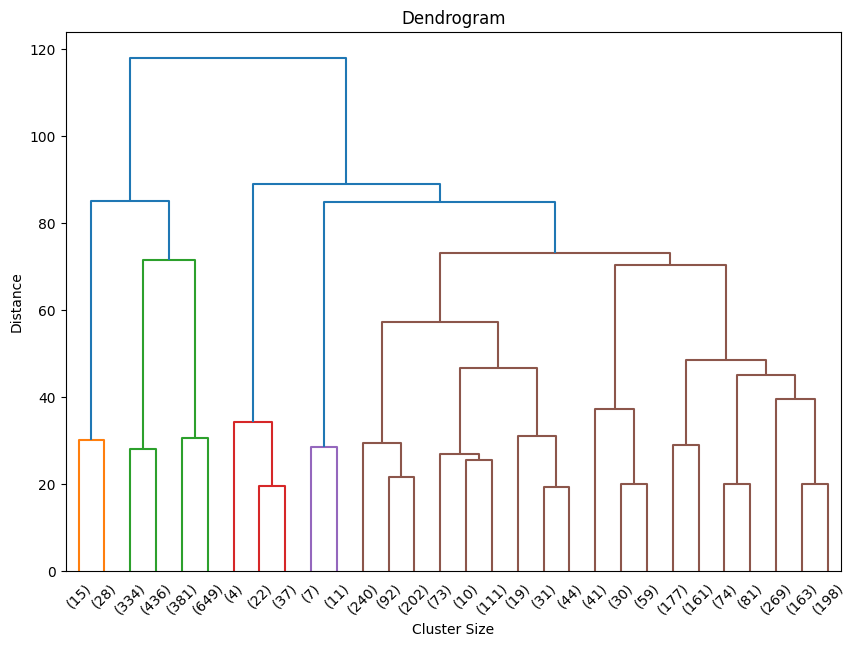

In [9]:
# Hierarchical Clustering with Euclidean Distance and Ward's Method

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the data
file_path = r"C:\Angelina\Schulich MBAN\MMAI 5000\EastWestAirlinesCluster.csv"
data = pd.read_csv(file_path)

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Perform hierarchical clustering
linked = linkage(data_normalized, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [10]:
# Choose the number of clusters (e.g., 5 clusters)
num_clusters = 5
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Display the cluster counts
print(data['Cluster'].value_counts())


Cluster
5    2075
2    1800
3      63
1      43
4      18
Name: count, dtype: int64


In [12]:
# Comparing clusters 

# Calculate the centroids
centroids = data.groupby('Cluster').mean()

# Display the centroids
print(centroids)



                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
1        2269.372093   68876.581395   23.255814   1.139535   2.348837   
2        2388.934444   38220.721111    9.431667   1.183889   1.000000   
3        1752.952381  160067.206349  573.587302   2.507937   1.000000   
4        1742.444444  129951.388889   65.666667   3.388889   1.000000   
5        1695.324337  101276.799518  251.093494   2.813012   1.000000   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
1         1.000000  14689.837209    17.534884         582.627907   
2         1.000000   3770.797222     6.238333         113.728333   
3         1.000000  42723.841270    34.142857        8148.619048   
4         3.722222  86259.888889    26.222222         422.222222   
5         1.000000  27421.138313    15.320482         524.836627   

         Fl

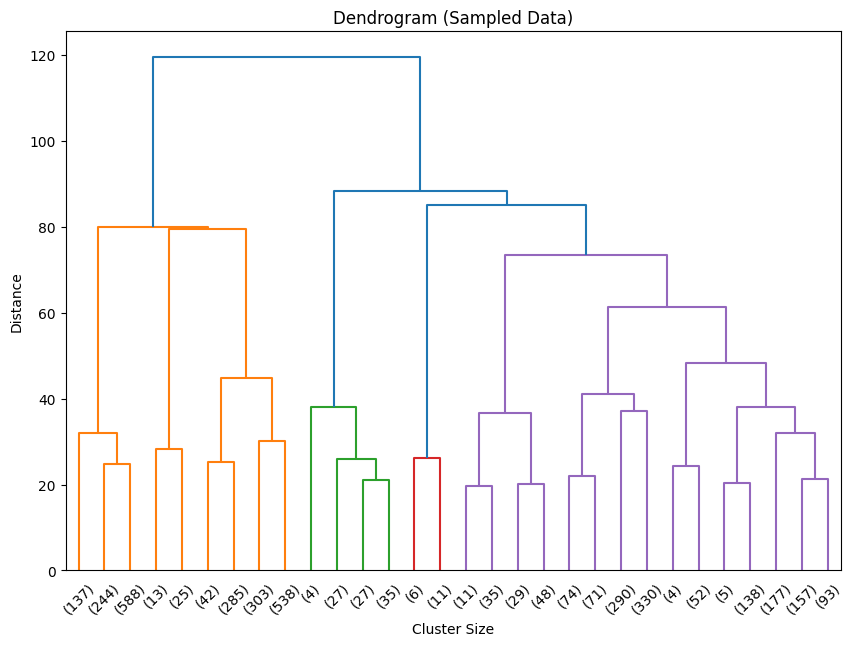

Cluster
5    1514
2    1206
1     969
3      93
4      17
Name: count, dtype: int64


In [13]:
# Check the Stability of the Clusters

import numpy as np

# Remove 5% of the data randomly
np.random.seed(42)
sampled_data = data.sample(frac=0.95, random_state=42)
sampled_data_normalized = scaler.transform(sampled_data.drop(columns=['Cluster']))

# Perform hierarchical clustering again
linked_sampled = linkage(sampled_data_normalized, method='ward')

# Plot the dendrogram for sampled data
plt.figure(figsize=(10, 7))
dendrogram(linked_sampled, truncate_mode='lastp', p=30)
plt.title('Dendrogram (Sampled Data)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Form clusters on the sampled data
sampled_clusters = fcluster(linked_sampled, num_clusters, criterion='maxclust')
sampled_data['Cluster'] = sampled_clusters

# Display the cluster counts for sampled data
print(sampled_data['Cluster'].value_counts())


In [14]:
#K means clustering 
from sklearn.cluster import KMeans

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_normalized)
data['KMeans_Cluster'] = kmeans.labels_

# Display the cluster counts for k-means clustering
print(data['KMeans_Cluster'].value_counts())


KMeans_Cluster
4    1251
2    1033
1     791
0     791
3     133
Name: count, dtype: int64


In [15]:
# Compare the centroids of hierarchical clusters and k-means clusters
kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns[:-2])
print(kmeans_centroids)

# You can analyze these centroids to see if the clusters are similar to hierarchical clusters


        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0 -0.175811 -0.130861    0.078662  -0.186842   0.030534  -0.062767   
1 -0.470463  0.697442   -0.004601   1.570371  -0.081094   0.248475   
2 -0.729293 -0.165189   -0.094146  -0.446131   0.000116  -0.057808   
3 -0.303403  1.327675    0.896742   0.186145   0.207334  -0.062767   
4  1.039947 -0.361779   -0.064150  -0.523986   0.009790  -0.062767   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.223563    -0.021897          -0.023402        -0.019304   
1     1.464041     0.897633          -0.044099        -0.036759   
2    -0.466725    -0.366729          -0.205835        -0.223827   
3     0.772040     1.865053           3.865602         4.211322   
4    -0.479072    -0.447428          -0.197923        -0.226971   

   Days_since_enroll    Award?  
0           0.181917  1.303918  
1           0.471950  0.554223  
2           0.706527 -0.766919  
3           0.338998  1.008084  
4          

In [16]:
# Analyze the centroids and determine the characteristics of each cluster
# For example:
# Cluster 1 (High Miles, High Balance): Target with luxury travel packages
# Cluster 2 (Low Miles, Low Balance): Target with discount offers or promotions

# Example analysis (adjust based on your centroids):
offers = {
    1: "Luxury travel packages",
    2: "Discount offers",
    3: "Frequent flyer bonuses",
    4: "Family travel packages",
    5: "Business travel offers"
}

# Print the offers for each cluster
for cluster_id, offer in offers.items():
    print(f"Cluster {cluster_id}: {offer}")


Cluster 1: Luxury travel packages
Cluster 2: Discount offers
Cluster 3: Frequent flyer bonuses
Cluster 4: Family travel packages
Cluster 5: Business travel offers
